### Imports

This jupyter notebook is used to create graphs that are displayed in the README. 
The free-tier BI visualization tools being limited (Tableau public and Looker were tested), I add up on top of the Support Team - Weekly report, figures and graphs on complaints per users, distribution of complaints per tag, repartition of conversations per hour and day of week and more.

In [11]:
import os
from pathlib import Path
import snowflake.connector
import pandas as pd
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import numpy as np


load_dotenv()

ANALYSES_DIR = Path("../intercom_case/analyses")

def fetch_df(sql_filename: str) -> pd.DataFrame:
    query_path = ANALYSES_DIR / sql_filename

    # read SQL text
    with query_path.open(encoding="utf-8") as f:
        sql = f.read()

    # Connection to Snowflake
    conn = snowflake.connector.connect(
        account   = os.getenv("SF_ACCOUNT"),
        user      = os.getenv("SF_USER"),
        password  = os.getenv("SF_PASSWORD"),
       # role      = os.getenv("SF_ROLE"),
        warehouse = os.getenv("SF_WAREHOUSE"),
        database  = os.getenv("SF_DATABASE"),
        schema    = os.getenv("SF_SCHEMA"),
    )

    df = pd.read_sql(sql, conn)

    return df

### Tags

In [31]:
tag = fetch_df("details_per_tags.sql")
tag

/var/folders/0g/ww94hfw52xz02146wnnfm5v40000gn/T/ipykernel_89305/4136067529.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,TAG_NAME,CNT_CONV,AVG_RATING
0,Badgeuse,1688,3.934901
1,Equipes,676,4.200000
2,Permissions,619,4.062500
3,Contrats Employés,530,4.091398
4,impression,472,4.259459
5,Absences,448,4.206897
6,rapport,392,4.250000
7,Facture,363,4.394958
8,Postes,356,4.144737
9,identifiants,284,4.232558


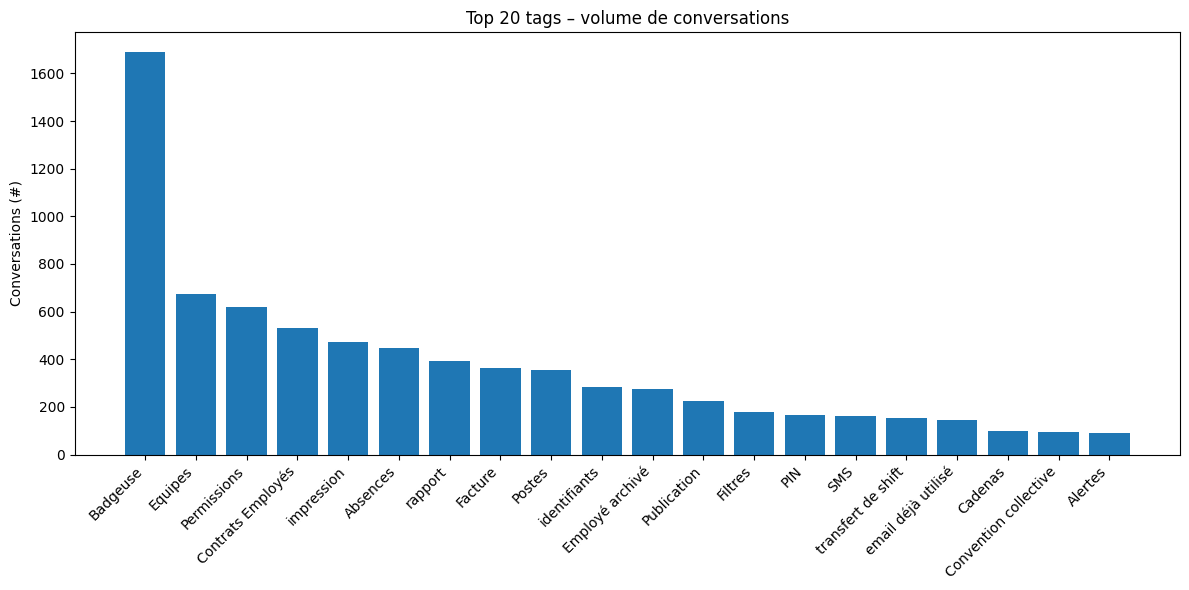

In [24]:
'''Plot the number of conversations per tag'''

top20 = (
    tag.sort_values("CNT_CONV", ascending=False)
      .head(20)
)

plt.figure(figsize=(12, 6))
plt.bar(
    top20["TAG_NAME"],
    top20["CNT_CONV"]
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Conversations (#)")
plt.title("Top 20 tags – volume de conversations")
plt.tight_layout()
plt.show()

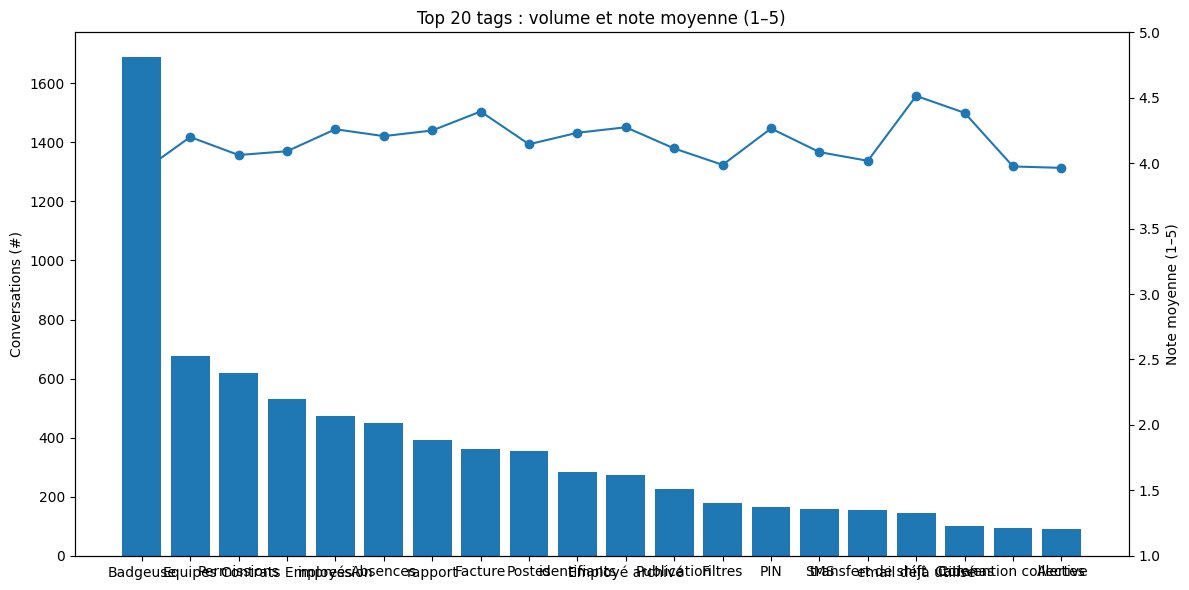

In [28]:
'''Plot the number of conversations and average rating per tag'''

top20 = (
    tag.sort_values("CNT_CONV", ascending=False)
        .head(20)
)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(
    top20["TAG_NAME"],
    top20["CNT_CONV"]
)
ax1.set_ylabel("Conversations (#)")

ax2 = ax1.twinx()
ax2.plot(
    top20["TAG_NAME"],
    top20["AVG_RATING"],
    marker="o"
)
ax2.set_ylabel("Note moyenne (1–5)")
ax2.set_ylim(1, 5)

plt.xticks(rotation=45, ha="right")
plt.title("Top 20 tags : volume et note moyenne (1–5)")
plt.tight_layout()
plt.show()

### Number of conversations per user

In [30]:
users = fetch_df("details_per_user_id.sql")
users.head()

/var/folders/0g/ww94hfw52xz02146wnnfm5v40000gn/T/ipykernel_89305/4136067529.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,USER_ID,CNT_CONV
0,61681a73e85ed3543b061b1e,35
1,613ba653694139c2ddebbce4,21
2,615ab35d83e7a52e4b280d56,21
3,6163f9ee399f077b49af2636,20
4,6141a839e42d3629fd1202c7,20


count    4454.000000
mean        2.227885
std         2.303187
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        35.000000
Name: CNT_CONV, dtype: float64


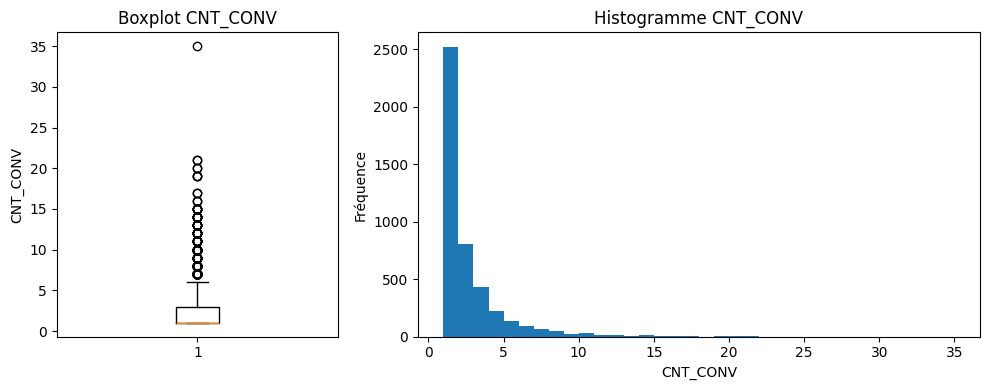

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

stats = users["CNT_CONV"].describe()
print(stats)

fig, (ax_box, ax_hist) = plt.subplots(
    nrows=1, ncols=2, figsize=(10, 4), sharey=False, gridspec_kw={"width_ratios": [1, 2]}
)

ax_box.boxplot(users["CNT_CONV"], vert=True)
ax_box.set_title("Boxplot CNT_CONV")
ax_box.set_ylabel("CNT_CONV")

ax_hist.hist(users["CNT_CONV"], bins="auto")
ax_hist.set_title("Histogramme CNT_CONV")
ax_hist.set_xlabel("CNT_CONV")
ax_hist.set_ylabel("Fréquence")

plt.tight_layout()
plt.show()

In [56]:
stats

count    4454.000000
mean        2.227885
std         2.303187
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        35.000000
Name: CNT_CONV, dtype: float64

In [36]:
deciles = users["CNT_CONV"].quantile(np.arange(0, 1.1, 0.1))
print(deciles)

0.0     1.0
0.1     1.0
0.2     1.0
0.3     1.0
0.4     1.0
0.5     1.0
0.6     2.0
0.7     2.0
0.8     3.0
0.9     5.0
1.0    35.0
Name: CNT_CONV, dtype: float64


### Main complaints (tag) of returning users

In [47]:
user_tag = fetch_df("details_per_user_id_tags.sql")
user_tag.head()

/var/folders/0g/ww94hfw52xz02146wnnfm5v40000gn/T/ipykernel_89305/4136067529.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,USER_ID,TAG_NAME,CNT_CONV
0,5c345b9f9be92dcb9df5ff21,Grand comptes,14
1,5f0f4e2d669a32988e88337c,Badgeuse,11
2,6141a839e42d3629fd1202c7,Badgeuse,10
3,6026321bbdaae71f34882d07,Badgeuse,9
4,5f586154f2e8337b4517e4f0,Badgeuse,9


In [51]:
user_tag

,USER_ID,TAG_NAME,CNT_CONV
0,5c345b9f9be92dcb9df5ff21,Grand comptes,14
1,5f0f4e2d669a32988e88337c,Badgeuse,11
2,6141a839e42d3629fd1202c7,Badgeuse,10
3,6026321bbdaae71f34882d07,Badgeuse,9
4,5f586154f2e8337b4517e4f0,Badgeuse,9
...,...,...,...
6137,5bbc962d03673b2ca5222e71,rapport,1
6138,5dd280725743c05b3953dc9b,identifiants,1
6139,61bc61f37d1b58fccee6a35b,Permissions,1
6140,5eecc19a2a24d882cdb424ca,Postes,1


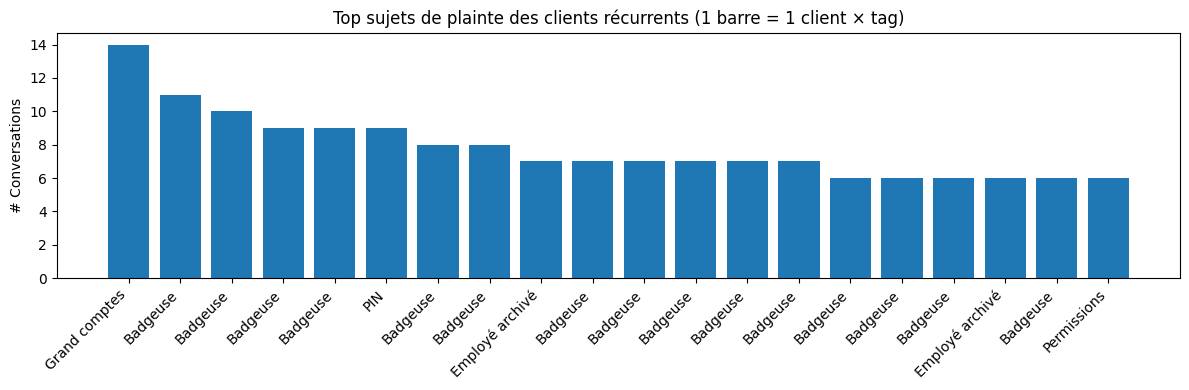

In [54]:
import matplotlib.pyplot as plt

top20 = user_tag.sort_values("CNT_CONV", ascending=False).head(20)

x_pos = range(len(top20))

plt.figure(figsize=(12, 4))
plt.bar(x_pos, top20["CNT_CONV"])

plt.xticks(x_pos, top20["TAG_NAME"], rotation=45, ha="right")

plt.ylabel("# Conversations")
plt.title("Top sujets de plainte des clients récurrents (1 barre = 1 client × tag)")
plt.tight_layout()
plt.show()

### Conversations per hour of day and day of week

In [41]:
time = fetch_df("detail_by_time_agg.sql")
time.head()

/var/folders/0g/ww94hfw52xz02146wnnfm5v40000gn/T/ipykernel_89305/4136067529.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,TIME_AGG,PERIOD,CNT_CONV
0,hour_of_day,0,32
1,hour_of_day,1,22
2,hour_of_day,2,20
3,hour_of_day,3,18
4,hour_of_day,4,31


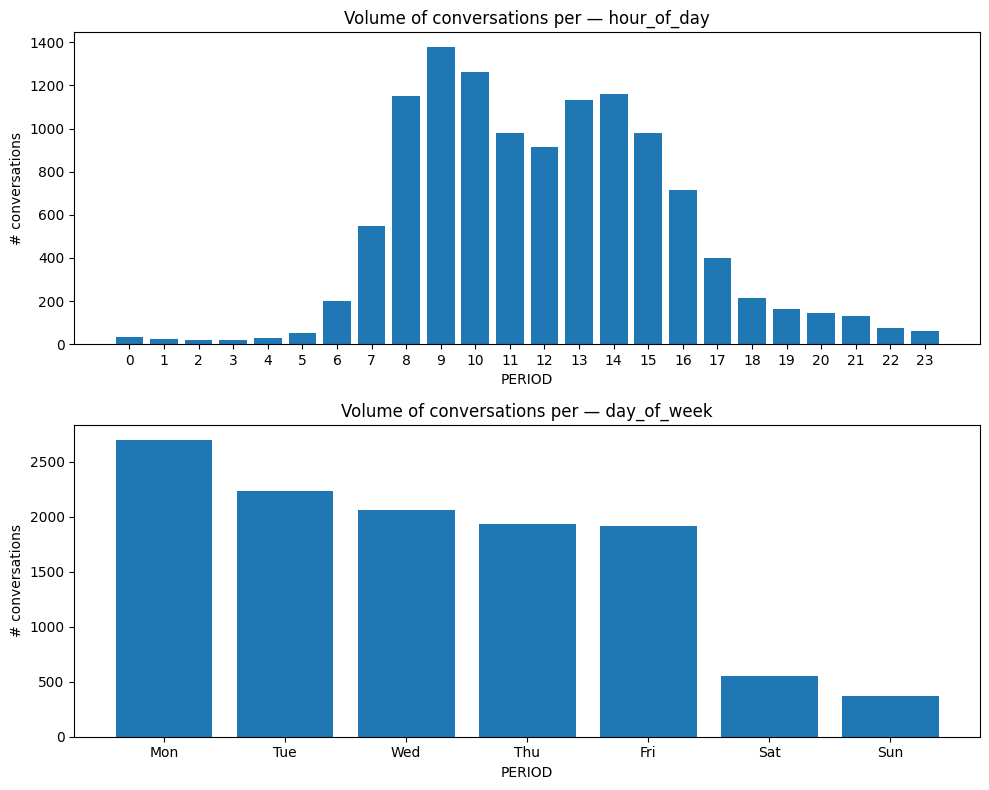

In [46]:
import matplotlib.pyplot as plt

day_labels = {1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat", 7: "Sun"}
agg_types   = time["TIME_AGG"].unique()

fig, axes = plt.subplots(
    nrows=len(agg_types),
    ncols=1,
    figsize=(10, 4 * len(agg_types)),
    sharex=False
)
if len(agg_types) == 1:
    axes = [axes]

for ax, agg in zip(axes, agg_types):
    subset = (
        time[time["TIME_AGG"] == agg]
        .sort_values("PERIOD")
    )

    # x - positions = PERIOD
    ax.bar(subset["PERIOD"], subset["CNT_CONV"])
    ax.set_title(f"Volume of conversations per — {agg}")
    ax.set_xlabel("PERIOD")
    ax.set_ylabel("# conversations")

    if agg == "hour_of_day":
        ax.set_xticks(range(0, 24))
    elif agg == "day_of_week":
        ax.set_xticks(list(day_labels.keys()))
        ax.set_xticklabels([day_labels[d] for d in day_labels])

plt.tight_layout()
plt.show()